## Data preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
waterdf = pd.read_csv("../dataset/water_potability.csv")

In [3]:
waterdf.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
waterdf.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Explanatory Data Analysis

In [5]:
waterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


##### There is only numerical values. So we don't need to use encoder on data.

In [6]:
# We check if there are missing values
waterdf.columns.isnull().sum(axis=0)

0

In [7]:
# We check if there are duplicated values
waterdf.duplicated().sum()

0

In [8]:
waterdf.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# If we see the precedent column, there is a big range between min and max of each column
# Let's plot the data to check if there are outliers

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

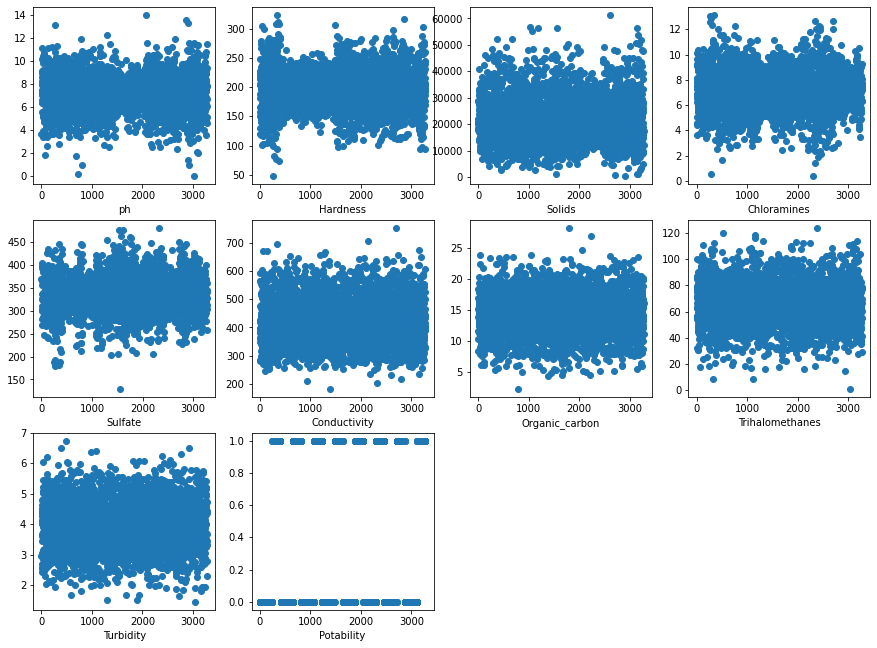

In [11]:
plt.figure(figsize=(15, 15))

cols = waterdf.columns
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xlabel(cols[i])
    plt.scatter(x=range(waterdf.shape[0]), y=waterdf[cols[i]])

In [12]:
#if we observe that plot, we can see there are no outliers
#As we are on binary classification (0 for non-potable and 1 for potable) let's visualize the amount of each value

In [13]:
x = waterdf['Potability'].value_counts()

([<matplotlib.patches.Wedge at 0x7f3adc9515b0>,
 [Text(-0.3722543665175176, 1.0350974285586076, 'Non-potable'),
  Text(0.3722543665175174, -1.0350974285586076, 'Potable')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61.0%'),
  Text(0.2030478362822822, -0.5645985973956041, '39.0%')])

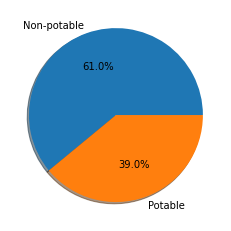

In [14]:
labels = ['Non-potable', 'Potable']
sizes =  [waterdf['Potability'].value_counts()[0], waterdf['Potability'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

In [15]:
# There is 3/5 of the dataset that is for Non-potable water and 2/5 for potable water
# We can then use traditional train_test_split

## Preprocessing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = waterdf.Potability
X = waterdf.drop(['Potability'], axis=1)

In [18]:
missing_columns = [col for col in X if X[col].isnull().any()]
missing_columns

['ph', 'Sulfate', 'Trihalomethanes']

In [19]:
for col in missing_columns:
    X[col] = X[col].replace(np.NaN, X[col].mean())

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

## Modeling

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [23]:
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Model accuracy = {:.2f}%".format(accuracy * 100))

Model accuracy = 62.80%
